In [1]:
import aim_modules as am
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.patches as mpatches
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
colors = sns.color_palette("Set2")
sns.set()
sns.set(font_scale=1.5)  # crazy big
sns.set_palette(colors)
%matplotlib inline

In [2]:
# collect all of the TI information
runs = ["run01","run02","run03","run04","run05"]
ti_home = "/Users/ChrisM/Documents/workspace/TI/"
times = ["100ps","250ps","500ps","1ns","5ns","10ns"]
names = ["N","CoulL","VdwL","Count","G","dG","AIMCount","dGCoulL","dGVdwL"]
ti_names = ["dGCoulL","dGVdwL"]

# create a dictionary to hold our results
# each result is a dataframe
# these results aren't comparable because they are for a different setup but we use
# this to init our dictionary
results = {}
for i in times:
    root = ti_home+i
    results[i] = am.import_pickle(root, runs, i)

In [3]:
# collect AIM results
cubic_states = {}
trapz_states = {}
aim_counts = {}
aim_averages = {}
num_lams = 21

aim_dhdl_states = {}
aim_dgdcoul = {}
aim_dgdvdw = {}
aim_dhdl_states = {}
aim_dgdcoul_averages = {}
aim_dgdvdw_averages = {}

df_allk = {}

for j in times:
    totals = []
    cubics = []
    cubic_states[j] = {}
    trapz_states[j] = {}
    aim_counts[j] = {}
    aim_dhdl_states[j] = {}
    aim_dgdcoul[j] = {}
    aim_dgdvdw[j] = {}
    df_allk[j] = {}
    aim_dgdcoulavg = np.zeros(num_lams)
    aim_dgdvdwavg = np.zeros(num_lams)
    avg = np.zeros(num_lams-1)
    for i in runs:
        cubic_states[j][i] = []
        trapz_states[j][i] = []
        aim_dhdl_states[j][i] = []
        file_in = "/Users/ChrisM/Documents/workspace/AIM/{0}/{0}{1}.out".format(j, i)

        aim, aim_cubic, counts, trapz, cubic, dhdl, dgdcoul, dgdvdw, coulLambdas, vdwLambdas = am.quad_AIM(file_in, names)
        totals.append(aim)
        cubics.append(aim_cubic)
        trapz_states[j][i] = trapz
        cubic_states[j][i] = cubic
        aim_dhdl_states[j][i] = dhdl
        aim_dgdcoul[j][i] = dgdcoul
        aim_dgdvdw[j][i] = dgdvdw
        
        aim_averages[j] = {}
            
        aim_dgdcoul[j][i] = dgdcoul
        aim_dgdvdw[j][i] = dgdvdw

    
        for k in range(num_lams-1):
            avg[k] += trapz_states[j][i][k]/len(runs)
        for k in range(num_lams):
            aim_dgdcoulavg[k] += aim_dgdcoul[j][i][k]/len(runs)
            aim_dgdvdwavg[k] += aim_dgdvdw[j][i][k]/len(runs)
        
    df_allk[j]['AIM_VDW'] = aim_dgdvdwavg
        
    results[j]['AIM'] = np.array(totals)
    results[j]['AIM-CUBIC'] = np.array(cubics)
    df_allk[j]['Coul_Lambdas'] = coulLambdas
    df_allk[j]['VdW_Lambdas'] = vdwLambdas

    aim_averages[j] = avg
    



In [4]:
# collect TI results
cubic_states = {}
trapz_states = {}
ti_dhdl_states = {}
ti_dgdcoul_averages = {}
ti_dgdvdw_averages = {}
ti_averages = {}
num_lams = len(coulLambdas)

ti_dgdcoul = {}
ti_dgdvdw = {}

for j in times:
    totals = []
    cubics = []
    cubic_states[j] = {}
    trapz_states[j] = {}
    ti_dhdl_states[j] = {}
    ti_dgdcoul[j] = {}
    ti_dgdvdw[j] = {}
    ti_dgdcoulavg = np.zeros(num_lams)
    ti_dgdvdwavg = np.zeros(num_lams)
    avg = np.zeros(num_lams-1)
    for i in runs:
        file_in = "/Users/ChrisM/Documents/workspace/TI/{0}/{1}.out".format(j, i)
        ti, ti_cubic, trapz, cubic, dhdl, dgdcoul, dgdvdw = am.quad_TI(file_in, ti_names, coulLambdas, vdwLambdas)
        totals.append(ti)
        cubics.append(ti_cubic)
        trapz_states[j][i] = trapz
        cubic_states[j][i] = cubic
        ti_dhdl_states[j][i] = dhdl
        ti_dgdcoul[j][i] = dgdcoul
        ti_dgdvdw[j][i] = dgdvdw

        for k in range(num_lams-1):
            avg[k] += trapz_states[j][i][k]/len(runs)
        for k in range(num_lams):
            ti_dgdcoulavg[k] += ti_dgdcoul[j][i][k]/len(runs)
            ti_dgdvdwavg[k] += ti_dgdvdw[j][i][k]/len(runs)
            
    df_allk[j]['FIXED_VDW'] = ti_dgdvdwavg
    df_allk[j]['Coul_Lambdas'] = coulLambdas
    df_allk[j]['VdW_Lambdas'] = vdwLambdas
    ti_averages[j] = avg


In [5]:
df = pd.DataFrame()
for i in times:
    twentyone_lambdas = pd.DataFrame.from_dict(df_allk[i])
    twentyone_lambdas['time'] = i
    df = pd.concat([df, twentyone_lambdas], ignore_index=True)

/Users/ChrisM/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


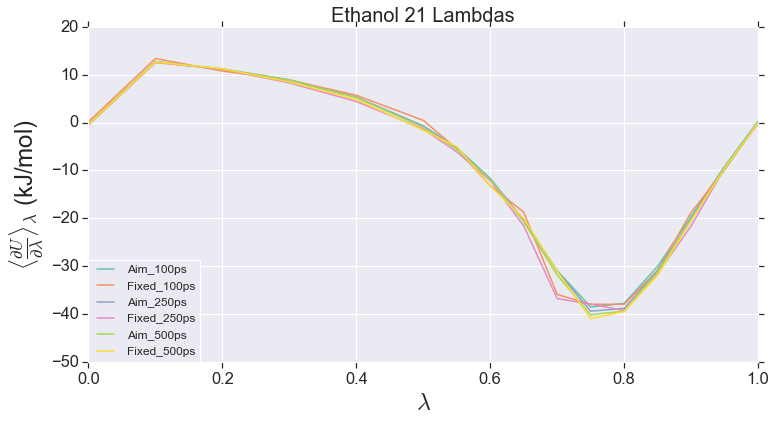

In [6]:
plt.figure(figsize=(12,6))
times = ["100ps","250ps","500ps"]

for j in times:
    twentyone_lambdas = df[df['time'] == j]
    
    sns.lineplot(x="VdW_Lambdas", y='AIM_VDW', label="Aim_{0}".format(j), data=twentyone_lambdas);
    sns.lineplot(x="VdW_Lambdas", y="FIXED_VDW", label="Fixed_{0}".format(j), data=twentyone_lambdas);
    
plt.ylabel(r'$\langle\frac{\partial U}{\partial \lambda}\rangle$$_{\lambda}$ (kJ/mol)', fontsize = 24);
plt.xlabel(r'$\lambda$', fontsize = 24);
plt.xlim(0.0,1.0);
plt.ylim(-50, 20);
plt.title("Ethanol 21 Lambdas", fontsize=20);
plt.legend(loc=0, borderaxespad=0., fontsize=12, ncol=1);

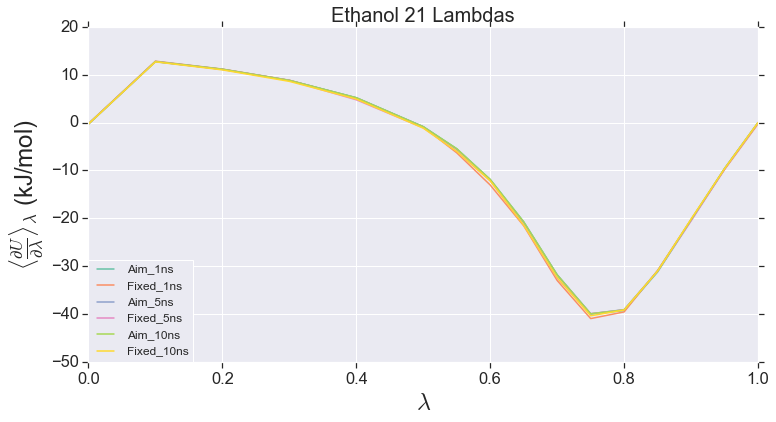

In [7]:
plt.figure(figsize=(12,6))
times = ["1ns","5ns","10ns"]

for j in times:
    twentyone_lambdas = df[df['time'] == j]

    sns.lineplot(x="VdW_Lambdas", y='AIM_VDW', label="Aim_{0}".format(j), data=twentyone_lambdas);
    sns.lineplot(x="VdW_Lambdas", y="FIXED_VDW", label="Fixed_{0}".format(j), data=twentyone_lambdas);
    
plt.ylabel(r'$\langle\frac{\partial U}{\partial \lambda}\rangle$$_{\lambda}$ (kJ/mol)', fontsize = 24);
plt.xlabel(r'$\lambda$', fontsize = 24);
plt.xlim(0.0,1.0);
plt.ylim(-50, 20);
plt.title("Ethanol 21 Lambdas", fontsize=20);
plt.legend(loc=0, borderaxespad=0., fontsize=12, ncol=1);

In [8]:
time = {'100ps':0.1,'250ps':0.25,'500ps':0.5,'1ns':1,'5ns':5,'10ns':10}
df['timens'] = 0
for i in time.keys():
    df['timens'][df['time'] == i] = time[i]

/Users/ChrisM/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/Users/ChrisM/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/ChrisM/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


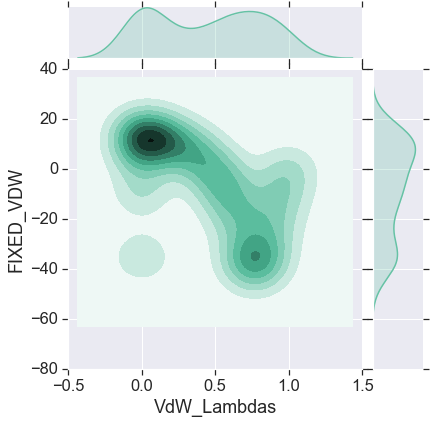

In [9]:
# kind must be either 'scatter', 'reg', 'resid', 'kde', or 'hex'
sns.jointplot(y="FIXED_VDW", x="VdW_Lambdas", data=df, kind='kde');

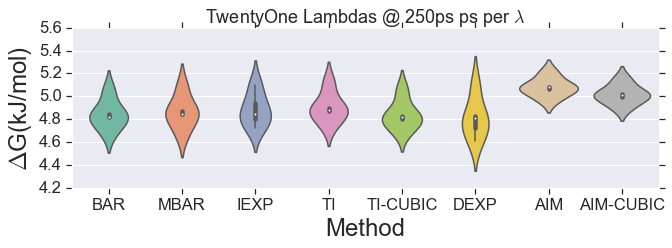

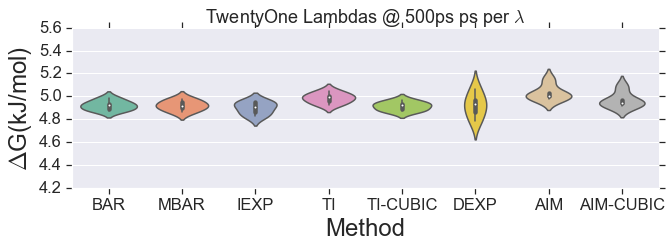

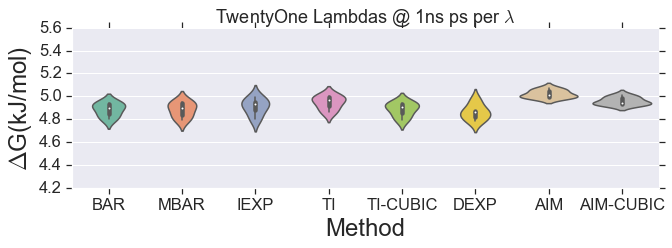

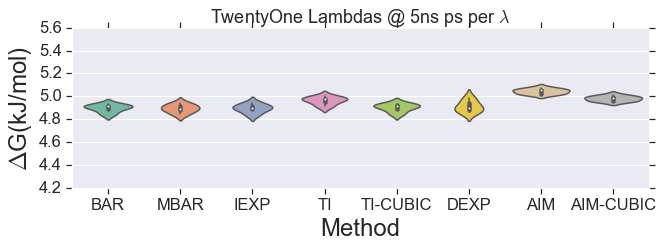

In [10]:
times = ["250ps","500ps","1ns","5ns"]

for i in times:
    twentyone_results = results[i].apply(np.vectorize(am.convert_to_kcal))
    twentyone_results['Number of Lambdas'] = 21
    columns = ['BAR','MBAR','IEXP', 'TI', 'TI-CUBIC', 'DEXP', 'AIM',
           'AIM-CUBIC']
    sns.catplot(data=twentyone_results[columns], notch=False, kind="violin",height=3, aspect=3);
    plt.ylabel(r'$\Delta$G(kJ/mol)', fontsize = 24);
    plt.xlabel(r'Method', fontsize = 24);
    plt.ylim(4.2, 5.6)

    plt.title("TwentyOne Lambdas @ {0} ps per $\lambda$".format(i));

In [11]:
keys = ['BAR', 'MBAR', 'IEXP', 'TI', 'TI-CUBIC', 'DEXP', 'AIM', 'AIM-CUBIC']
# Plot the results using error bars for each lambda window
df = pd.DataFrame()
for i in keys:
    ddf = pd.DataFrame()
    ddf['250 ps'] = np.array(results['250ps'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['500 ps'] = np.array(results['500ps'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['1 ns'] = np.array(results['1ns'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['5 ns'] = np.array(results['5ns'][i].apply(np.vectorize(am.convert_to_kcal)))

    ddf['key'] = i
    df = pd.concat([df,ddf])

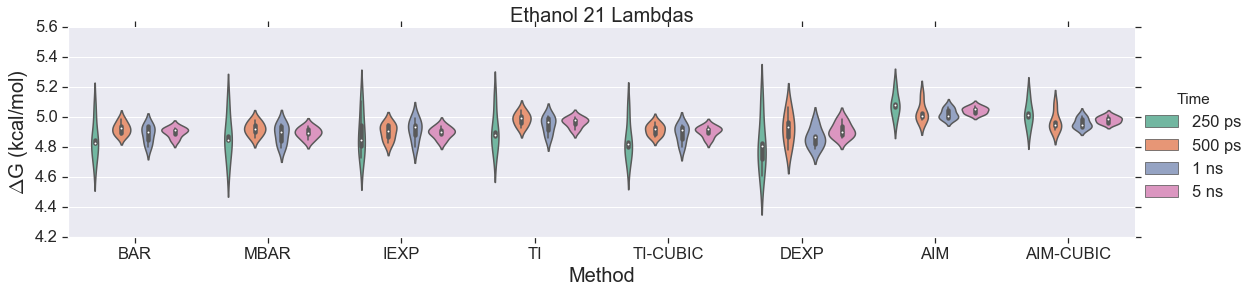

In [12]:
melted_df = pd.melt(df,
                   id_vars = 'key',
                   value_vars = ['250 ps','500 ps', '1 ns', '5 ns'],
                   var_name = 'Time',
                   value_name = 'DeltaG(kcal/mol)')

melted_df.columns = ['Method', 'Time','DeltaG(kcal/mol)']

g = sns.catplot(x="Method",
            y="DeltaG(kcal/mol)",
            hue="Time"
            ,data=melted_df,
            kind="violin",
            height=4,
            aspect=4,
            legend_out=True)

plt.ylabel("$\Delta$G (kcal/mol)", fontsize = 20)
plt.xlabel("Method", fontsize = 20)
plt.title("Ethanol 21 Lambdas", fontsize=20);



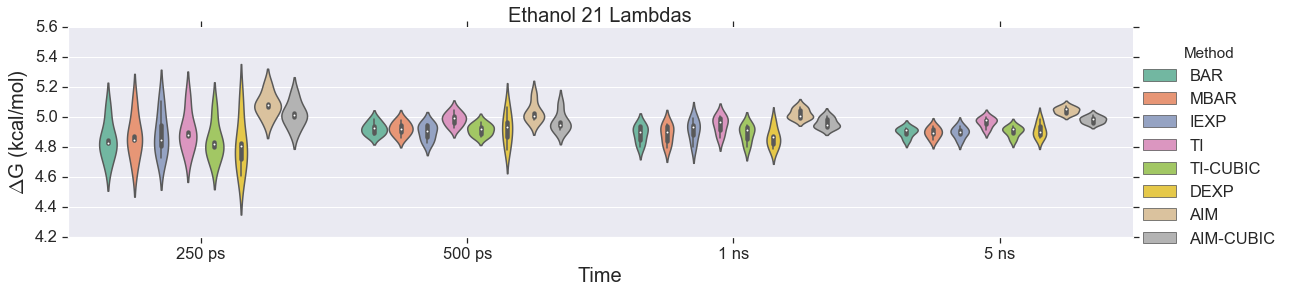

In [13]:
melted_df = pd.melt(df,
                   id_vars = 'key',
                   value_vars = ['250 ps','500 ps','1 ns', '5 ns'],
                   var_name = 'Time',
                   value_name = 'DeltaG(kcal/mol)')

melted_df.columns = ['Method', 'Time','DeltaG(kcal/mol)']

g = sns.catplot(x="Time",
            y="DeltaG(kcal/mol)",
            hue="Method"
            ,data=melted_df,
            kind="violin",
            height=4,
            aspect=4,
            legend_out=True)

plt.ylabel("$\Delta$G (kcal/mol)", fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.title("Ethanol 21 Lambdas", fontsize=20);


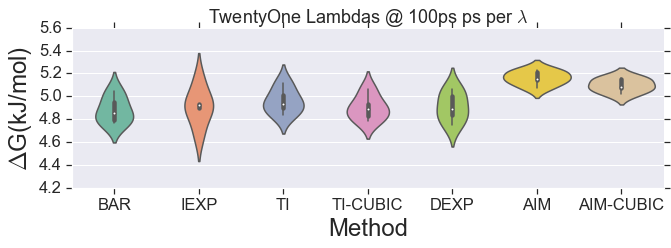

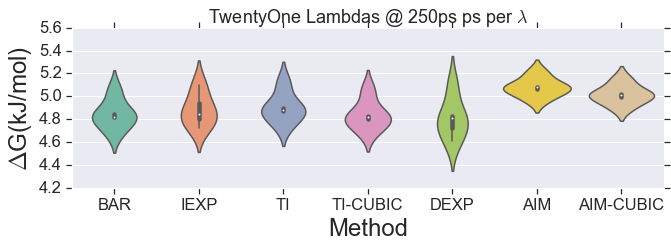

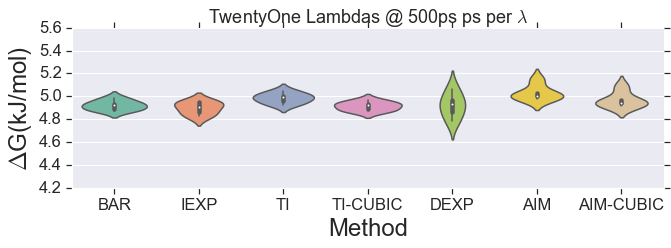

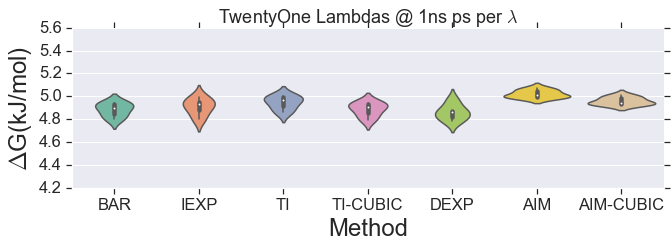

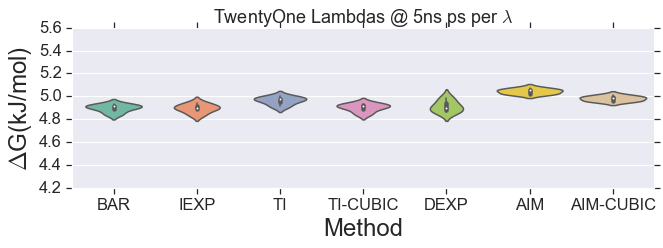

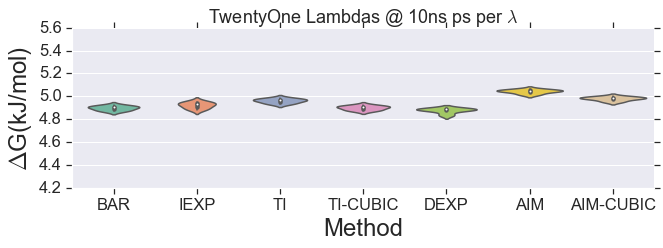

In [14]:
times = ["100ps","250ps","500ps","1ns","5ns","10ns"]

for i in times:
    twentyone_results = results[i].apply(np.vectorize(am.convert_to_kcal))
    twentyone_results['Number of Lambdas'] = 21
    columns = ['BAR', 'IEXP', 'TI', 'TI-CUBIC', 'DEXP', 'AIM',
           'AIM-CUBIC']
    sns.catplot(data=twentyone_results[columns], notch=False, kind="violin",height=3, aspect=3);
    plt.ylabel(r'$\Delta$G(kJ/mol)', fontsize = 24);
    plt.xlabel(r'Method', fontsize = 24);
    plt.ylim(4.2, 5.6)

    plt.title("TwentyOne Lambdas @ {0} ps per $\lambda$".format(i));

In [15]:
keys = ['BAR', 'IEXP', 'TI', 'TI-CUBIC', 'DEXP', 'AIM', 'AIM-CUBIC']
# Plot the results using error bars for each lambda window
df = pd.DataFrame()
for i in keys:
    ddf = pd.DataFrame()
    ddf['100 ps'] = np.array(results['100ps'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['250 ps'] = np.array(results['250ps'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['500 ps'] = np.array(results['500ps'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['1 ns'] = np.array(results['1ns'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['5 ns'] = np.array(results['5ns'][i].apply(np.vectorize(am.convert_to_kcal)))
    ddf['10 ns'] = np.array(results['10ns'][i].apply(np.vectorize(am.convert_to_kcal)))


    ddf['key'] = i
    df = pd.concat([df,ddf])

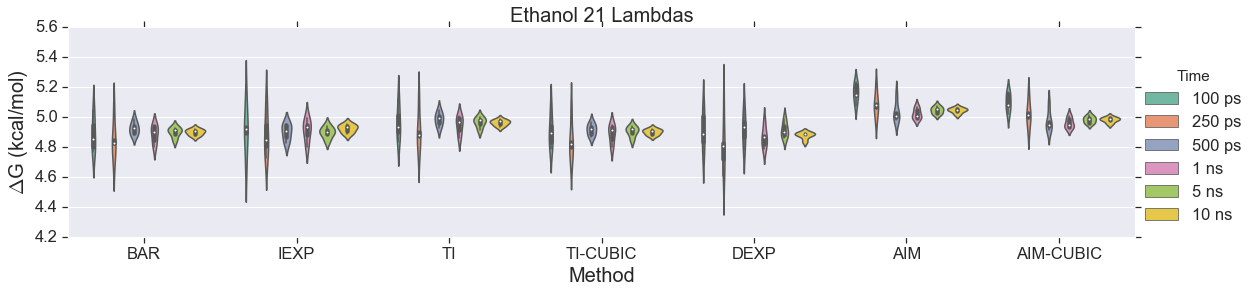

In [16]:
melted_df = pd.melt(df,
                   id_vars = 'key',
                   value_vars = ['100 ps','250 ps','500 ps', '1 ns','5 ns', '10 ns'],
                   var_name = 'Time',
                   value_name = 'DeltaG(kcal/mol)')

melted_df.columns = ['Method', 'Time','DeltaG(kcal/mol)']

g = sns.catplot(x="Method",
            y="DeltaG(kcal/mol)",
            hue="Time"
            ,data=melted_df,
            kind="violin",
            height=4,
            aspect=4,
            legend_out=True)

plt.ylabel("$\Delta$G (kcal/mol)", fontsize = 20)
plt.xlabel("Method", fontsize = 20)
plt.title("Ethanol 21 Lambdas", fontsize=20);

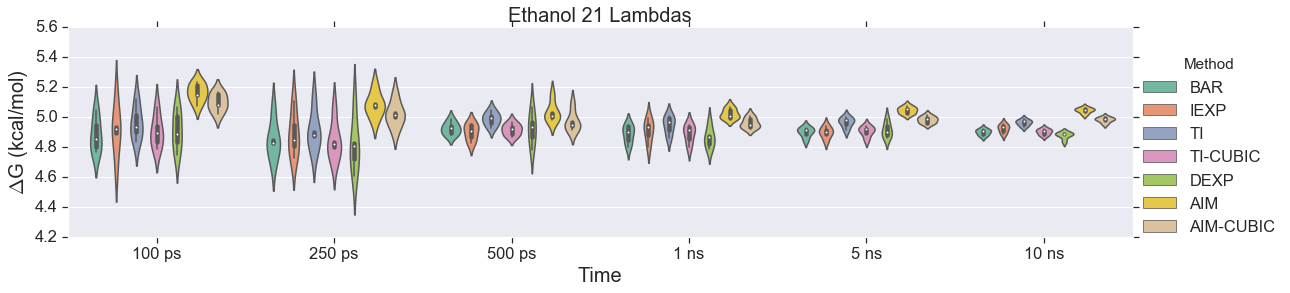

In [17]:
melted_df = pd.melt(df,
                   id_vars = 'key',
                   value_vars = ['100 ps','250 ps','500 ps', '1 ns','5 ns', '10 ns'],
                   var_name = 'Time',
                   value_name = 'DeltaG(kcal/mol)')

melted_df.columns = ['Method', 'Time','DeltaG(kcal/mol)']

g = sns.catplot(x="Time",
            y="DeltaG(kcal/mol)",
            hue="Method"
            ,data=melted_df,
            kind="violin",
            height=4,
            aspect=4,
            legend_out=True)

plt.ylabel("$\Delta$G (kcal/mol)", fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.title("Ethanol 21 Lambdas", fontsize=20);



In [18]:
# collect all of the TI information
runs = ["run01","run02","run03","run05"]
ti_home = "/Users/ChrisM/Documents/workspace/TI/33ls/"
times = ["100ps"]
names = ["N","CoulL","VdwL","Count","G","dG","AIMCount","dGCoulL","dGVdwL"]
ti_names = ["dGCoulL","dGVdwL"]

# create a dictionary to hold our results
# each result is a dataframe
# these results aren't comparable because they are for a different setup but we use
# this to init our dictionary
results = {}
for i in times:
    root = ti_home
    results[i] = am.import_pickle(root, runs, "results")

In [19]:
# collect AIM results
cubic_states = {}
trapz_states = {}
aim_counts = {}
aim_averages = {}
num_lams = 33

aim_dhdl_states = {}
aim_dgdcoul = {}
aim_dgdvdw = {}
aim_dhdl_states = {}
aim_dgdcoul_averages = {}
aim_dgdvdw_averages = {}

df_allk = {}

for j in times:
    files = ["33ls/aim{0}33ls0{1}.out".format(j,i) for i in range(1,5)]
    totals = []
    cubics = []
    cubic_states[j] = {}
    trapz_states[j] = {}
    aim_counts[j] = {}
    aim_dhdl_states[j] = {}
    aim_dgdcoul[j] = {}
    aim_dgdvdw[j] = {}
    df_allk[j] = {}
    aim_dgdcoulavg = np.zeros(num_lams)
    aim_dgdvdwavg = np.zeros(num_lams)
    avg = np.zeros(num_lams-1)
    for i in files:
        cubic_states[j][i] = []
        trapz_states[j][i] = []
        aim_dhdl_states[j][i] = []
        file_in = "/Users/ChrisM/Documents/workspace/AIM/{0}".format(i)
        aim, aim_cubic, counts, trapz, cubic, dhdl, dgdcoul, dgdvdw, coulLambdas, vdwLambdas = am.quad_AIM(file_in, names)
        totals.append(aim)
        cubics.append(aim_cubic)
        trapz_states[j][i] = trapz
        cubic_states[j][i] = cubic
        aim_dhdl_states[j][i] = dhdl
        aim_dgdcoul[j][i] = dgdcoul
        aim_dgdvdw[j][i] = dgdvdw
        
        aim_averages[j] = {}
            
        aim_dgdcoul[j][i] = dgdcoul
        aim_dgdvdw[j][i] = dgdvdw

    
        for k in range(num_lams-1):
            avg[k] += trapz_states[j][i][k]/len(runs)
        for k in range(num_lams):
            aim_dgdcoulavg[k] += aim_dgdcoul[j][i][k]/len(runs)
            aim_dgdvdwavg[k] += aim_dgdvdw[j][i][k]/len(runs)
        
    df_allk[j]['AIM_VDW'] = aim_dgdvdwavg
    results[j]['AIM'] = np.array(totals)
    results[j]['AIM-CUBIC'] = np.array(cubics)
    df_allk[j]['Coul_Lambdas'] = coulLambdas
    df_allk[j]['VdW_Lambdas'] = vdwLambdas

    aim_averages[j] = avg
    


In [20]:
df_allk

{'100ps': {'AIM_VDW': array([-34.929835 ,  -9.56521  ,   4.667905 ,  11.06458  ,  13.385695 ,
          14.0348825,  13.00692  ,  11.4420025,   9.2998675,   5.71578  ,
          -0.3630125,  -2.068085 ,  -4.19243  ,  -6.4528675,  -8.75307  ,
         -11.530115 , -14.4698425, -18.0317225, -21.7834025, -26.030205 ,
         -29.9631675, -33.86394  , -36.9370125, -29.8643775, -39.2908775,
         -38.1176025, -35.6531925, -32.24978  , -28.3798625, -24.226055 ,
         -19.995655 ,  -9.4353825,   0.11987  ]),
  'Coul_Lambdas': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
         1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
         1. , 1. , 1. , 1. , 1. , 1. , 1. ]),
  'VdW_Lambdas': array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 ,
         0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 , 0.72,
         0.74, 0.7 , 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.95, 1.  ])}}

In [21]:
df = pd.DataFrame()
for i in times:
    thirtythree_lambdas = pd.DataFrame.from_dict(df_allk[i])
    thirtythree_lambdas['time'] = i
    df = pd.concat([df, thirtythree_lambdas], ignore_index=True)

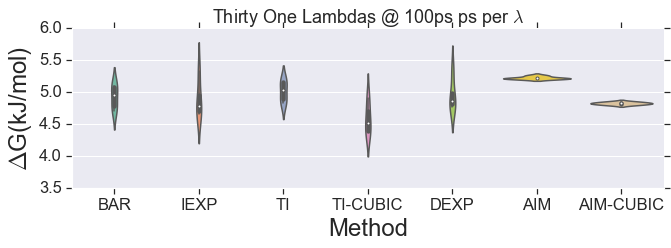

In [22]:

for i in times:
    thirtythree_lambdas = results[i].apply(np.vectorize(am.convert_to_kcal))
    thirtythree_lambdas['Number of Lambdas'] = 31
    columns = ['BAR', 'IEXP', 'TI', 'TI-CUBIC', 'DEXP', 'AIM',
           'AIM-CUBIC']
    sns.catplot(data=thirtythree_lambdas[columns], notch=False, kind="violin",height=3, aspect=3);
    plt.ylabel(r'$\Delta$G(kJ/mol)', fontsize = 24);
    plt.xlabel(r'Method', fontsize = 24);
    plt.ylim(3.5, 6.0)

    plt.title("Thirty One Lambdas @ {0} ps per $\lambda$".format(i));